In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import KMeansSMOTE
import numpy as np
from collections import Counter

In [3]:
folds = pd.read_csv('output/features/annotated/hg38/SNVs.hg38.folds.txt',sep = '\t',header = None )
#ind = folds[folds[0]!=0].index
df = pd.read_csv('output/features/annotated/hg38/SNVs.hg38.combined.txt.gz',sep = '\t',header = None   )
df['fold']=folds

#df[df[0]==1]
pos = df[df[0]==1]


In [ ]:
df_test = pd.DataFrame()
l_test = []

In [64]:
for f in range(10):
    if f >0:
        x_test =  x.features
        y_test = x.labels
    print(f,"----------------------------------")
    
    neg = df[df[0]==0]
    neg = neg[neg['fold']==f]
    pos = df[df[0]==1]
    df0 = pos.append(neg)

    X = df0.iloc[:,4:].apply(lambda x: x.replace(np.nan,0))#.values
    y = df0[0]

#    df0 = df[df['fold']==f]
#    neg = df0[df0[0]==0]
#    pos = df0[df0[0]==1]
#   df1 = pos.append(neg)
#    X = df1.iloc[:,4:].apply(lambda x: x.replace(np.nan,0))#.values
#    y = df1[0]
   
    p = pos.shape[0]*2
    n = p*3
    rus = RandomUnderSampler(sampling_strategy = {0:n})
    smote = KMeansSMOTE(sampling_strategy = {1:p})

    # downsample the neagtives
    Xn,yn = rus.fit_resample(X,y)
    X = Xn.append(pos.iloc[:,4:]).apply(lambda x: x.replace(np.nan,0))
    y = yn.append(pos[0])
    
    # upsample teh positives
    X_,y_ = smote.fit_resample(X,y)
    print(Counter(y))
    
    # prepare the datacet 
    dataset = X_.drop(columns = 'fold')
    dataset[label] = y_.values
    dataset = dataset.set_index(label, drop = True)
    # run the model
    x = XGBoost(predictor,dataset,param_dict,label)
    x.fit_xgboost()
    x.cross_validation()
    
    if f >0:
        print(accuracy_score(x.get_predictions(x_test), y_test)*100)
    
    

0 ----------------------------------
Counter({0: 2436, 1: 812})
Baseline model - training accuracy xgboost: 96.92%
Baseline model - hold-out accuracy xgboost: 97.39%
Cross-validation accuracy xgboost: 96.42%
1 ----------------------------------
Counter({0: 2436, 1: 812})
Baseline model - training accuracy xgboost: 97.56%
Baseline model - hold-out accuracy xgboost: 97.67%
Cross-validation accuracy xgboost: 97.15%
97.38300492610837
2 ----------------------------------
Counter({0: 2436, 1: 812})
Baseline model - training accuracy xgboost: 97.20%
Baseline model - hold-out accuracy xgboost: 96.92%
Cross-validation accuracy xgboost: 96.69%
97.41379310344827
3 ----------------------------------
Counter({0: 2436, 1: 812})
Baseline model - training accuracy xgboost: 97.20%
Baseline model - hold-out accuracy xgboost: 97.20%
Cross-validation accuracy xgboost: 97.15%
97.04433497536947
4 ----------------------------------
Counter({0: 2436, 1: 812})
Baseline model - training accuracy xgboost: 97.06%

In [65]:
X_all = df.iloc[:,4:30]
y_all = df[0]

prob = x.get_probabilities(X_all)
pred = x.get_predictions(X_all)

Counter(pred)

Counter({1: 2907238, 0: 10995402})

In [ ]:
#pd.DataFrame(prob[:,1])

In [18]:
file = 'output/predictions/hg38/SNVs.hg38.predictions.txt'
ps = pd.read_csv(file, sep='\t',header = None)
ps_pred = ps.idxmax(axis =1)
Counter(ps_pred)

In [ ]:
eval(y_all,ps,ps_pred)

In [54]:
for i in [0.5,1,2,3,5,10,20]:
    dataset = X.drop(columns = 'fold')
    dataset[label] = y.values
    dataset = dataset.set_index(label, drop = True)
    # run the model
    x = XGBoost(predictor,dataset,param_dict,label)
    x.fit_xgboost(spw = i)
    x.cross_validation()

    X_all = df.iloc[:,4:30]
    y_all = df[0]

    prob = x.get_probabilities(X_all)
    pred = x.get_predictions(X_all)
    print(Counter(pred))

Baseline model - training accuracy xgboost: 91.97%
Baseline model - hold-out accuracy xgboost: 91.18%
Cross-validation accuracy xgboost: 86.14%
Counter({0: 13413900, 1: 488740})
Baseline model - training accuracy xgboost: 96.35%
Baseline model - hold-out accuracy xgboost: 89.71%
Cross-validation accuracy xgboost: 89.74%
Counter({0: 13416665, 1: 485975})
Baseline model - training accuracy xgboost: 90.51%
Baseline model - hold-out accuracy xgboost: 85.29%
Cross-validation accuracy xgboost: 89.10%
Counter({0: 13774805, 1: 127835})
Baseline model - training accuracy xgboost: 97.08%
Baseline model - hold-out accuracy xgboost: 85.29%
Cross-validation accuracy xgboost: 90.53%
Counter({0: 12895215, 1: 1007425})
Baseline model - training accuracy xgboost: 92.70%
Baseline model - hold-out accuracy xgboost: 82.35%
Cross-validation accuracy xgboost: 87.49%
Counter({0: 12042639, 1: 1860001})
Baseline model - training accuracy xgboost: 93.43%
Baseline model - hold-out accuracy xgboost: 88.24%
Cross-

In [45]:
Counter(pred)

Counter({0: 13812905, 1: 89735})

[('presision', 0.021583663087859428), ('recall', 0.8232889634210251), ('accuracy', 0.993534537325285), ('f score', 0.00281780765689309), ('roc', 0.9492731240882021)]


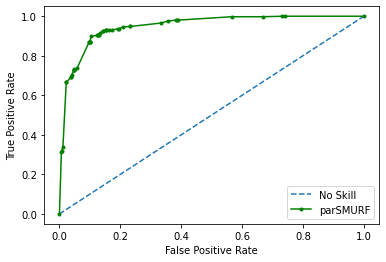

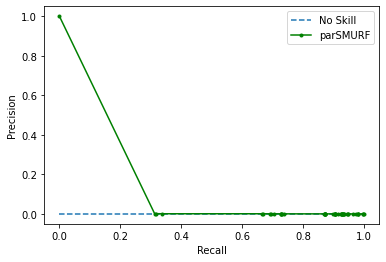

In [46]:
eval(y_all,pd.DataFrame(prob[:,1]),pred)

In [10]:
param_dict = {'multi':{'objective':'multi:softmax',
                     'eval_metric':['merror','mlogloss']},
            'binary':{'objective':'binary:logistic',
            'eval_metric':['error','logloss']}}

predictor = 'xgboost'
label = 'pathogenicity'

#param_dict = {'multi':{'objective':'multi:softmax',
#                     'eval_metric':['aucpr']},
#            'binary':{'objective':'binary:logistic',
#            'eval_metric':['aucpr']}}


In [52]:
#import utils as u
import numpy as np
import pandas as pd


from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import  cross_val_score
from sklearn.preprocessing import LabelEncoder

class XGBoost:
    def __init__(self,predictor, dataset,param_dict,x,split=0.33):
        
        self.features  = dataset.reset_index(drop=True)
        self.labels =  pd.DataFrame(dataset.index)
            

        self.predictor =predictor

        ## split into train and test set
        self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(self.features,self.labels,test_size=split)
        # define binary or multivlass
        self.y_train = np.ravel(self.y_train)
        self.y_test = np.ravel(self.y_test)
        self.param = param_dict['binary']   
            
    def define_xgboost(self,n_estimators,max_depth,lr,spw):
        # define the model
        self.model = XGBClassifier(
                                learning_rate =lr,n_estimators=n_estimators,
                                eval_metric=self.param['eval_metric'],
                                max_depth=max_depth, verbosity=1, 
                                min_child_weight=7,
                                gamma=0, subsample=0.8,
                                colsample_bytree=0.8,
                                objective=self.param['objective'],
                                nthread=4, seed=27,
                                booster = 'gbtree',
                                tree_method='hist'
                                ,scale_pos_weight=spw)
        return self.model
    def fit_xgboost(self, n_estimators = 10,max_depth = 3,lr=0.1,spw=1):
        
        self.define_xgboost(n_estimators,max_depth,lr,spw=1.3)
        eval_set = [(self.x_train, self.y_train), (self.x_test, self.y_test)]
        self.model.fit(self.x_train, self.y_train , eval_metric=self.param['eval_metric'],
                                          eval_set=eval_set,
                                          verbose=False, early_stopping_rounds=10)
        self.training_acc()
        self.hold_out_acc()
        
    def training_acc(self):
        # calculate test accuracy
        self.acc_tr = accuracy_score(self.y_train,
        self.get_predictions(self.x_train))*100
        print("Baseline model - training accuracy %s: %.2f%%" % (self.predictor,self.acc_tr))
    
    def hold_out_acc(self):
        # calculate holdout accuracy
        self.acc_ho = accuracy_score(self.y_test,
        self.get_predictions(self.x_test))*100
        print("Baseline model - hold-out accuracy %s: %.2f%%" % (self.predictor,self.acc_ho))

    def get_predictions(self, d):
        # calculate predictions (labels)

        return self.model.predict(d)
                
    def get_probabilities(self, d = None):
        # calculate predictions (probability distributions)
        return self.model.predict_proba(d)
        
    def feature_importance(self,c = None):
        # show c most important features
        imp = pd.DataFrame()
        imp = pd.DataFrame(list((zip(self.x_train.columns, self.model.feature_importances_))))
        imp.columns = ['feature', 'importance']
        self.imp = imp.sort_values('importance', ascending = False)
        return self.imp[:c]
    
    def plot_imp(self, typ = 'gain', max_num_features = 15):
        # plot importance of features
        self.name = ''
        self.model.get_booster().feature_names = self.x_train.columns.to_list()
      
        ax = plot_importance(self.model, importance_type = typ, max_num_features = max_num_features, show_values = False, 
                ylabel = None, xlabel = None)
        ax.figure.tight_layout()
        self.name = self.name+'_'+typ
        ax.figure.savefig(self.name+'.png')
        return ax

        
    def cross_validation(self, n = 5):
        
        # cross validate, default 5 to speed up the calculations
        self.skf = StratifiedKFold(n_splits=5, random_state=7425, shuffle=True)
        scores = cross_val_score(self.model, self.x_train, self.y_train, cv = self.skf, scoring='accuracy')
        self.cv_acc = np.mean(scores)*100
        print('Cross-validation accuracy %s: %.2f%%' % (self.predictor,self.cv_acc))
        
        
    def paramter_tuning(self,param_list, n = 5):
        # param_list - dictionary of parameters to tune
        # parameters for CV are defined in cross_validation() to avoid discrepancies
        label_encoded_y = LabelEncoder().fit_transform(self.y_test)
        self.grid_search = GridSearchCV(self.model, param_list, 
                                    n_jobs=-1,cv=self.skf, verbose=1, 
                                   scoring='accuracy',return_train_score = True,
                                  refit = 'best_score_')
        self.grid_result = self.grid_search.fit(self.x_test, label_encoded_y)
        # summarize results
        print("Best: %f using %s" % (self.grid_result.best_score_*100, self.grid_result.best_params_))
    
    def plt_tree(self, num_trees  = 0):
        # plot a desicion tree (total number is defined as a model parameter)
        xgb.to_graphviz(self.model, num_trees=num_trees , max_depth = None,  **{'size':str(40)})




    



In [28]:
from sklearn.metrics import roc_curve
#from sklearn.metrics import precision_recall_curve
import sklearn.metrics as sm
from matplotlib import pyplot

def eval(lab,df,pred):
    precision, recall, thresholds = sm.precision_recall_curve(lab, df[0])

    p=precision.mean()
    r=recall.mean()
    a=sm.accuracy_score(lab,pred)
    f=sm.f1_score(lab, pred, average='binary')
    au=sm.roc_auc_score(lab,df[0])
    l = list(zip(['presision','recall','accuracy','f score','roc'],[p,r,a,f,au]))
    print(l)

    pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fpr, tpr, _ = roc_curve(lab, df[0])
    pyplot.plot(fpr, tpr, marker='.', label='parSMURF',color='green')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()

    y = lab#[0]
    no_skill = len(y[y==1]) / len(y)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    #precision, recall, _ = precision_recall_curve(y, df[0])
    pyplot.plot(recall, precision, marker='.', label='parSMURF',color='green')
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    pyplot.show()
    


In [2]:
import json
with open('config/SNVs.test.json') as f:
    data = json.load(f)

In [3]:
data

{'name': 'SNVs.hg38',
 'exec': {'name': 'parSMURF1',
  'ensThrd': 4,
  'rfThrd': 1,
  'seed': 1,
  'verboseLevel': 3,
  'saveTime': True,
  'timeFile': 'timeout.txt',
  'printCfg': True,
  'mode': 'test',
  'optimizer': 'no'},
 'data': {'dataFile': 'output/predictions/lifted/last/random.features.vcf.gz',
  'outFile': 'output/predictions/lifted/last/random.predictions.vcf.gzt',
  'forestDir': 'models/hg38'},
 'folds': {'nFolds': 10},
 'params': {'nParts': [100],
  'fp': [2],
  'ratio': [3],
  'k': [5],
  'nTrees': [10],
  'mtry': [5]}}

In [ ]:
zcat output/predictions/lifted/last/random.features.vcf.gz | tail -n +2 | cat -f 3- |sed 's/N\/A/0/' |less

